# Simple Neural Network in Pytorch

Neural Networks are a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

The Generic Neural Network architecture consists of the following:

1. **Input layer**: Data is fed into the network through the input layer. The number of neurons in the input layer is equivalent to the number of features in the data. The input layer is technically not regarded as one of the layers in the network because no computation occurs at this point. 
2. **Hidden layer**: The layers between the input and output layers are called hidden layers. A network can have an arbitrary number of hidden layers - the more hidden layers there are, the more complex the network. 
3. **Output layer**: The output layer is used to make a prediction. 
4. **Neurons**: Each layer has a collection of neurons interacting with neurons in other layers. 
5. **Activation function**: Performs non-linear transformations to help the model learn complex patterns from the data. 

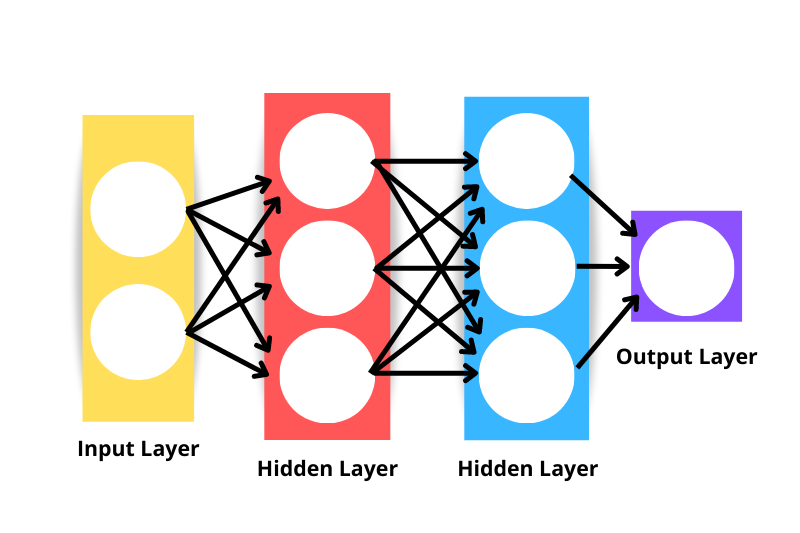




https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch

## Neural Network Working

### Initializations

**Weight initialization**

Weight initialization is the first component in the neural network architecture. The initial weights we set to define the start point for the optimization process of the neural network model. 

**Zero initialization**

Zero initialization means that weights are initialized as zero. This is not a good solution as our neural network would fail to break symmetry - it will not learn. 

**Random initialization**

Random initialization breaks the symmetry, which means it’s better than zero initialization, but some factors may dictate the model's overall quality. 

**Xavier/Glorot initialization**

A Xavier or Glorot initialization - it goes by either name - is a heuristical approach used to initialize weights. It’s common to see this initialization approach whenever a tanh or sigmoid activation function is applied to the weighted average

**He/Kaiming initialization**

The He or Kaiming initialization is another heuristic approach. The difference with the He and Xavier heuristic is that He initialization uses a different scaling factor for the weights that consider the non-linearity of activation functions. 

### Forward propagation

Neural networks work by taking a weighted average plus a bias term and applying an activation function to add a non-linear transformation. In the weighted average formulation, each weight determines the importance of each feature (i.e., how much it contributes to predicting the output).

z = (X₁·W₁ + X₂·W₂ + ... + Xₙ·Wₙ) + b

The formula above is the weighted average plus a bias term where, 

*   z is the weighted sum of a neuron's input
*   Wn denotes the weights
*   Xn denotes the independent variables, and
*   b is the bias term.


### Activation functions

**Sigmoid**

The sigmoid function is characterized by an “S”-shaped curve that is bounded between the values zero and one. It’s a differentiable function, meaning the slope of the curve can be found at any two points, and monotonic, which means it’s neither entirely increasing nor decreasing.

**Tanh**

The hyperbolic tangent (tanh) has the same “S”- shaped curve as the sigmoid function, except the values are bounded between -1 and 1. Thus, small inputs are mapped closer to -1, and larger inputs are mapped closer to 1.

**Softmax**

The softmax function is generally used as an activation function in the output layer. It’s a generalization of the sigmoid function to multiple dimensions. 

**Rectified Linear Unit (ReLU)**

The rectified linear unit (ReLU) activation function came in as a solution to this problem and is often the default activation function for several neural networks. 
ReLU is bounded between zero and infinity: notice that for input values less than or equal to zero, the function returns zero, and for values above zero, the function returns the input value provided (i.e., if you input two the two will be returned). 


### Backpropagation

At the end of the first forward pass, the network makes predictions using the initialized weights, which are not tuned. Thus, it’s highly likely that the predictions the model makes will not be accurate. Using the loss calculated from forward propagation, we pass information back through the network to fine-tune the weights in a process known as backpropagation. 

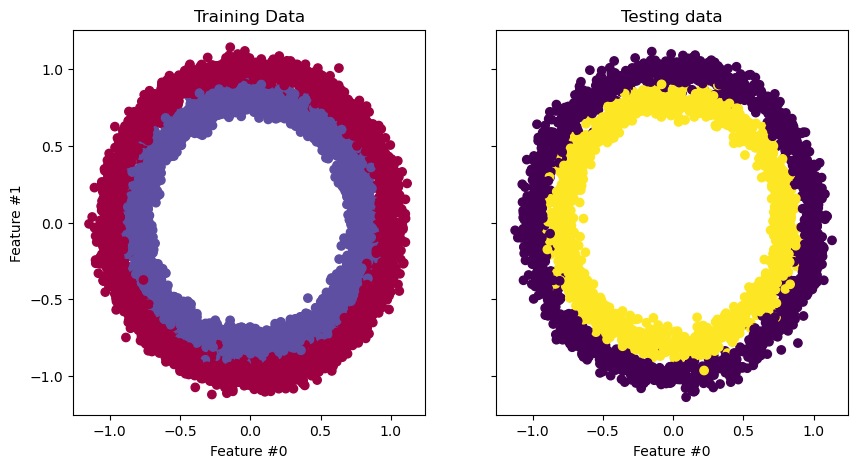

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create a dataset with 10,000 samples.
X, y = make_circles(n_samples = 10000,
                    noise= 0.05,
                    random_state=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=26)

# Visualize the data.
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
train_ax.set_title("Training Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")
plt.show()

In [13]:
import warnings
warnings.filterwarnings("ignore")

import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break



Batch: 1
X shape: torch.Size([64, 2])
y shape: torch.Size([64])


In [15]:
import torch
from torch import nn
from torch import optim

input_dim = 2
hidden_dim = 10
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))

        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [18]:
learning_rate = 0.1

loss_fn = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [19]:
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

Training Complete


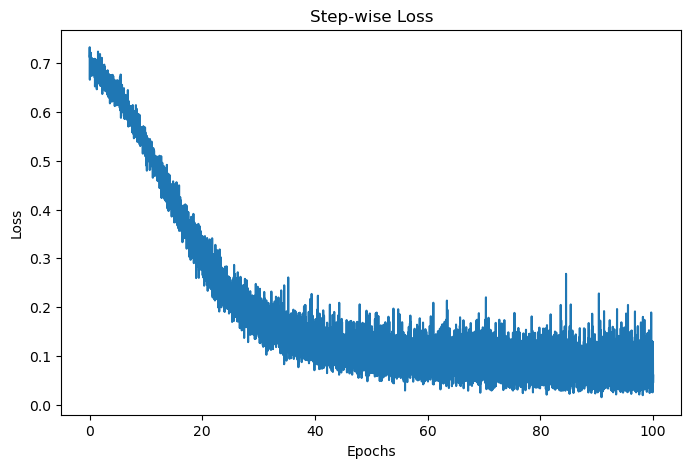

In [20]:
step = np.linspace(0, 100, 10500)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [22]:
import itertools

In [28]:
y_pred = []  # Declaration of y_pred as an empty list
y_test = []

with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y)
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the 3300 test instances: {100 * correct // total}%')


Accuracy of the network on the 3300 test instances: 31%


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns


y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1635
         1.0       0.98      0.98      0.98      1665

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



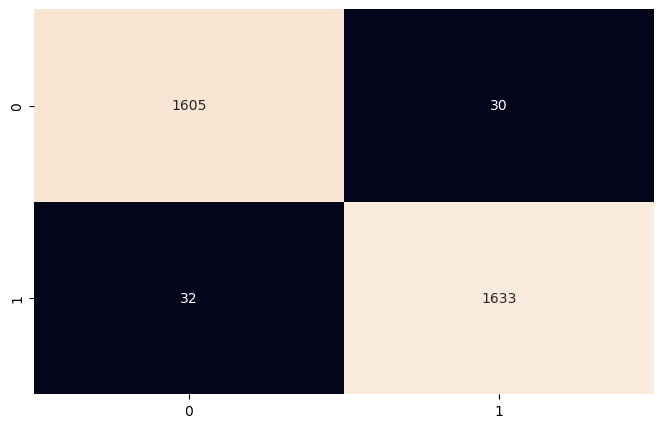

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()